# Chapter 10 - Introduction to Artificial Neural Networks with Keras Code Reproduction

In [1]:
# Impor TensorFlow dan Keras
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Memastikan versi TensorFlow
print("Versi TensorFlow:", tf.__version__)
print("Versi Keras:", keras.__version__)

Versi TensorFlow: 2.18.0
Versi Keras: 3.8.0


In [2]:
# Memuat dataset Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Memisahkan validation set dan melakukan scaling piksel
# Scaling penting untuk Gradient Descent
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

# Nama kelas untuk plotting
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Membuat model menggunakan Keras Sequential API
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), # Meratakan gambar 28x28 menjadi array 1D
    keras.layers.Dense(300, activation="relu"), # Hidden layer dengan 300 neuron dan aktivasi ReLU
    keras.layers.Dense(100, activation="relu"), # Hidden layer kedua dengan 100 neuron
    keras.layers.Dense(10, activation="softmax") # Output layer dengan 10 neuron (satu per kelas) dan aktivasi softmax
])

# Menampilkan ringkasan model
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6703 - loss: 1.0118 - val_accuracy: 0.8272 - val_loss: 0.5185
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8219 - loss: 0.5088 - val_accuracy: 0.8370 - val_loss: 0.4635
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8407 - loss: 0.4503 - val_accuracy: 0.8530 - val_loss: 0.4261
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8501 - loss: 0.4221 - val_accuracy: 0.8598 - val_loss: 0.4068
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8609 - loss: 0.3941 - val_accuracy: 0.8672 - val_loss: 0.3824
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8645 - loss: 0.3869 - val_accuracy: 0.8712 - val_loss: 0.3701
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8692 - loss: 0.3680 - val_accuracy: 0.8624 - val_loss: 0.3858
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8694 - loss: 0.3620 - 

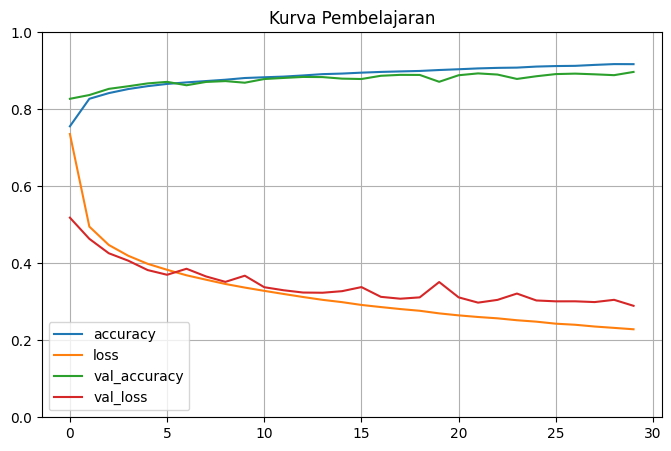


Hasil evaluasi pada test set:
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8823 - loss: 0.3338


[0.33045119047164917, 0.8824999928474426]

In [4]:
# Mengompilasi model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd", # Stochastic Gradient Descent
              metrics=["accuracy"])

# Melatih model
# history akan menyimpan metrik pelatihan untuk setiap epoch
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

# Memplot kurva pembelajaran
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Mengatur batas sumbu y
plt.title("Kurva Pembelajaran")
plt.show()

# Mengevaluasi model pada test set
print("\nHasil evaluasi pada test set:")
model.evaluate(X_test, y_test)

In [5]:
# Mengambil 3 instance pertama dari test set untuk prediksi
X_new = X_test[:3]
y_proba = model.predict(X_new)
print("\nProbabilitas prediksi (softmax):\n", y_proba.round(2))

# Mendapatkan kelas dengan probabilitas tertinggi
y_pred = np.argmax(model.predict(X_new), axis=-1)
print("\nPrediksi kelas:", y_pred)
print("Nama kelas yang diprediksi:", np.array(class_names)[y_pred])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step

Probabilitas prediksi (softmax):
 [[0.   0.   0.   0.   0.   0.01 0.   0.01 0.   0.98]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Prediksi kelas: [9 2 1]
Nama kelas yang diprediksi: ['Ankle boot' 'Pullover' 'Trouser']


In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Memuat dan menyiapkan data
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

# Scaling fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

# Membangun model regresi
model_reg = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1) # Output layer hanya dengan 1 neuron tanpa aktivasi
])

# Kompilasi dan latih model
model_reg.compile(loss="mean_squared_error", optimizer="sgd")
history_reg = model_reg.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model_reg.evaluate(X_test, y_test)
print("\nMSE pada test set (Regresi):", mse_test)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.8837 - val_loss: 0.9426
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7821 - val_loss: 0.5392
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4400 - val_loss: 0.4439
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4114 - val_loss: 0.4286
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3704 - val_loss: 0.4183
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3675 - val_loss: 0.4167
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3489 - val_loss: 0.4079
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3467 - val_loss: 0.4041
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3592 - val_loss: 0.4012
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3548 - val_loss: 0.4020
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3522 - val_loss: 0.3994
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

In [7]:
# Menggunakan data housing yang sudah disiapkan sebelumnya
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2]) # Menggabungkan input dengan output dari deep path
output = keras.layers.Dense(1)(concat)

model_func = keras.Model(inputs=[input_], outputs=[output])
model_func.summary()

# Kompilasi dan latih model
model_func.compile(loss="mean_squared_error", optimizer="sgd")
history_func = model_func.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 30)        │        270 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 30)        │        930 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ input_layer_2[0]… │
│ (Concatenate)       │                   │            │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_8']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2594

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_8']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.2580 - val_loss: 0.6528
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0896 - val_loss: 2.8552
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7159 - val_loss: 8.0178
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3424 - val_loss: 4.2110
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7.0255 - val_loss: 1.4425
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.7941 - val_loss: 0.5964
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4254 - val_loss: 0.4505
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4076 - val_loss: 0.4044
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3609 - val_loss: 0.4098
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3434 - val_loss: 0.3835
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3383 - val_loss: 0.3839
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

In [8]:
# Membuat kelas model Wide & Deep
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # menangani argumen standar
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

# Penggunaan subclassing API (membutuhkan split data input)
# ... (kode setup data input A dan B)

In [9]:
# Menggunakan model klasifikasi gambar dari awal
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
# model.fit(...) # asumsikan model sudah dilatih

# Menyimpan model ke file
model.save("my_fashion_mnist_model.h5")
print("\nModel telah disimpan.")

# Memuat model dari file
model_loaded = keras.models.load_model("my_fashion_mnist_model.h5")
print("Model telah dimuat.")
model_loaded.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Model telah disimpan.
Model telah dimuat.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,612 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [12]:
# Menggunakan model klasifikasi gambar yang baru
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Membuat callback ModelCheckpoint dan EarlyStopping
checkpoint_cb = keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

# Scale the image data
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

# Melatih model dengan callbacks
history_cb = model.fit(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[checkpoint_cb, early_stopping_cb])

# HASIL: Pelatihan akan berhenti jika tidak ada kemajuan di validation set selama 10 epoch,
# dan bobot terbaik akan dikembalikan. Model terbaik juga akan disimpan ke "best_model.h5".

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6807 - loss: 1.0279

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6808 - loss: 1.0277 - val_accuracy: 0.7909 - val_loss: 0.5924
Epoch 2/10
1404/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8254 - loss: 0.5140

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8254 - loss: 0.5140 - val_accuracy: 0.8214 - val_loss: 0.5078
Epoch 3/10
1384/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8412 - loss: 0.4585

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8412 - loss: 0.4584 - val_accuracy: 0.8381 - val_loss: 0.4632
Epoch 4/10
1405/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8505 - loss: 0.4279

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8505 - loss: 0.4279 - val_accuracy: 0.8489 - val_loss: 0.4353
Epoch 5/10
1397/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8584 - loss: 0.4067

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8583 - loss: 0.4067 - val_accuracy: 0.8555 - val_loss: 0.4178
Epoch 6/10
1397/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8643 - loss: 0.3897

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8643 - loss: 0.3898 - val_accuracy: 0.8603 - val_loss: 0.4043
Epoch 7/10
1405/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8680 - loss: 0.3758

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8680 - loss: 0.3758 - val_accuracy: 0.8639 - val_loss: 0.3926
Epoch 8/10
1394/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8717 - loss: 0.3637

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8717 - loss: 0.3637 - val_accuracy: 0.8662 - val_loss: 0.3857
Epoch 9/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8751 - loss: 0.3531

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8751 - loss: 0.3531 - val_accuracy: 0.8690 - val_loss: 0.3786
Epoch 10/10
1383/1407 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8793 - loss: 0.3433

1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8793 - loss: 0.3434 - val_accuracy: 0.8714 - val_loss: 0.3725
